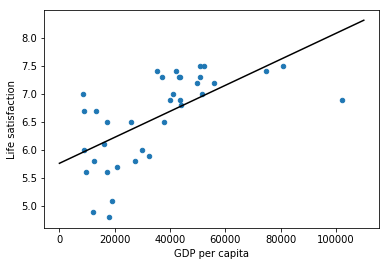

[[1802687.53336486]]


In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


    

#load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv",thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1',na_values='n/a')


#prepare the data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    #get the pandas dataframe of GDP per capita and Life satisfaction
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]


country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) 

#regularization remove_indices = [0, 1, 6, 8, 33, 34, 35]
country_stats.to_csv('country_stats.csv',encoding='utf-8')
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

#Visualize the data
country_stats.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')

#Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()

#Train the model
lin_reg_model.fit(X, Y)

#plot Regression model
t0, t1 = lin_reg_model.intercept_[0], lin_reg_model.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1 * X, "k")
plt.show()

#Make a prediction for Cyprus
X_new=[[77]]
print(lin_reg_model.predict(X_new))